In [1]:
import pandas as pd
import numpy as np
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('asthma_disease_data.csv')

In [3]:
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,7421,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,...,3.125249,5.166032,0,1,0,0,0,1,1,Dr_Confid
2388,7422,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,...,1.132977,5.509502,0,0,0,1,1,0,1,Dr_Confid
2389,7423,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,...,1.685962,3.346877,1,0,1,1,0,1,1,Dr_Confid
2390,7424,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,...,3.481549,1.713274,0,1,1,0,1,1,0,Dr_Confid


In [4]:
df.drop(['DoctorInCharge','PatientID'],axis =1 , inplace=
       True)

In [5]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,7.388481,...,0,1.369051,4.941206,0,0,1,0,0,1,0
1,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,...,0,2.197767,1.702393,1,0,0,1,1,1,0
2,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,1.460593,...,0,1.698011,5.022553,1,1,1,0,1,1,0
3,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,0.581905,...,0,3.032037,2.300159,1,0,1,1,1,0,0
4,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,0.980875,...,0,3.470589,3.067944,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,2,29.059613,0,3.019854,6.119637,8.300960,2.483829,...,0,3.125249,5.166032,0,1,0,0,0,1,1
2388,18,1,0,1,20.740850,0,5.805180,4.386992,7.731192,7.733983,...,0,1.132977,5.509502,0,0,0,1,1,0,1
2389,54,0,3,2,37.079560,0,4.735169,8.214064,7.483521,2.794847,...,0,1.685962,3.346877,1,0,1,1,0,1,1
2390,46,1,0,2,23.444712,0,9.672637,7.362861,6.717272,9.448862,...,1,3.481549,1.713274,0,1,1,0,1,1,0


In [6]:
df.corr()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
Age,1.000000,-0.003205,0.020022,-0.006711,0.016184,-0.009309,0.000053,0.004262,0.002718,-0.042311,...,0.019516,-0.007535,0.009594,0.007899,0.024534,-0.006197,0.028948,-0.026368,0.016008,-0.015111
Gender,-0.003205,1.000000,0.019266,-0.026615,0.023856,-0.012545,0.021761,-0.015375,-0.023442,0.000744,...,-0.003373,0.013243,-0.027673,-0.012716,0.020916,0.000089,-0.008273,-0.004889,0.029384,0.003128
Ethnicity,0.020022,0.019266,1.000000,0.004130,0.013947,-0.007343,0.036608,0.009032,-0.010136,-0.037757,...,-0.015297,-0.017714,0.031680,-0.012132,0.018938,-0.013025,-0.026594,0.014656,0.014656,0.017124
EducationLevel,-0.006711,-0.026615,0.004130,1.000000,0.004501,0.013126,-0.015380,-0.037059,0.017655,0.026831,...,0.024057,-0.003145,-0.001876,0.014067,0.009490,-0.031617,-0.017651,-0.000744,-0.008214,0.008185
BMI,0.016184,0.023856,0.013947,0.004501,1.000000,0.004890,-0.012046,-0.014996,-0.012891,-0.028962,...,0.010484,-0.010356,0.003358,0.045725,0.015136,-0.009908,-0.003992,-0.001453,0.011947,-0.012522
Smoking,-0.009309,-0.012545,-0.007343,0.013126,0.004890,1.000000,0.013838,-0.027010,-0.012348,0.011038,...,0.034271,0.015578,0.016444,-0.005121,-0.059075,-0.011109,-0.013507,0.014152,-0.002629,-0.019321
PhysicalActivity,0.000053,0.021761,0.036608,-0.015380,-0.012046,0.013838,1.000000,0.049487,0.007208,-0.029539,...,-0.035085,0.015749,-0.029711,0.013758,-0.024513,-0.028887,0.000670,-0.009144,-0.004371,0.005066
DietQuality,0.004262,-0.015375,0.009032,-0.037059,-0.014996,-0.027010,0.049487,1.000000,0.014355,0.006955,...,0.020919,-0.007315,-0.002165,0.039474,0.035641,0.012674,-0.013483,0.022328,-0.024092,-0.003149
SleepQuality,0.002718,-0.023442,-0.010136,0.017655,-0.012891,-0.012348,0.007208,0.014355,1.000000,-0.029374,...,-0.035456,-0.003637,0.000808,0.010577,-0.011363,-0.006576,0.015291,-0.005175,-0.026065,0.018022
PollutionExposure,-0.042311,0.000744,-0.037757,0.026831,-0.028962,0.011038,-0.029539,0.006955,-0.029374,1.000000,...,0.006201,-0.024337,0.027617,-0.007375,0.019123,0.027246,0.005673,0.014951,-0.009472,-0.004535


In [7]:
df.isna().sum()

Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [9]:
df.describe()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,5.013030,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,2.935605,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,0.001022,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,2.432559,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,5.036519,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,7.630037,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,9.998964,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Diagnosis', ylabel='Age'>

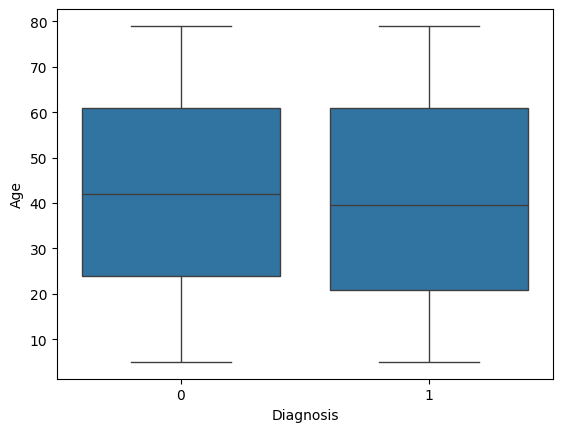

In [10]:
sns.boxplot(x='Diagnosis',y='Age', data = df)

<Axes: xlabel='Age', ylabel='count'>

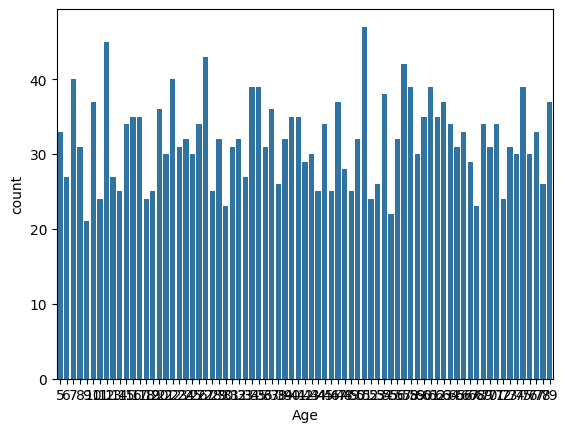

In [11]:
sns.countplot(x='Age',data= df)

<Axes: xlabel='Gender', ylabel='count'>

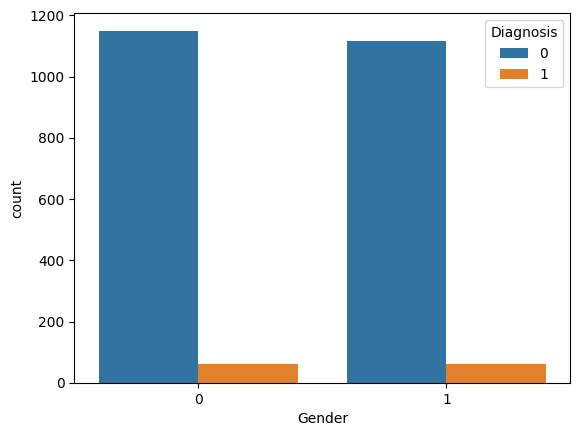

In [12]:
sns.countplot(x='Gender',data= df,hue ='Diagnosis')

In [13]:
df.iloc[:,[6,7,8,9,10,11,12,13,14,15,26]].corr()

,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,DustExposure,PetAllergy,FamilyHistoryAsthma,HistoryOfAllergies,Eczema,Diagnosis
PhysicalActivity,1.000000,0.049487,0.007208,-0.029539,0.006504,-0.011742,-0.011780,-0.004768,0.043583,-0.012431,0.005066
DietQuality,0.049487,1.000000,0.014355,0.006955,0.017552,-0.027905,-0.053914,-0.010992,0.029169,0.034052,-0.003149
SleepQuality,0.007208,0.014355,1.000000,-0.029374,-0.040430,-0.031544,-0.035942,0.012707,-0.023146,-0.001807,0.018022
PollutionExposure,-0.029539,0.006955,-0.029374,1.000000,0.011658,-0.008230,0.018802,-0.010226,0.008356,0.000465,-0.004535
PollenExposure,0.006504,0.017552,-0.040430,0.011658,1.000000,-0.002338,0.004886,0.007677,-0.004431,0.000982,0.015099
DustExposure,-0.011742,-0.027905,-0.031544,-0.008230,-0.002338,1.000000,0.011337,-0.023438,-0.031149,0.014095,-0.025972
PetAllergy,-0.011780,-0.053914,-0.035942,0.018802,0.004886,0.011337,1.000000,0.018377,0.019499,-0.011928,-0.013078
FamilyHistoryAsthma,-0.004768,-0.010992,0.012707,-0.010226,0.007677,-0.023438,0.018377,1.000000,-0.010158,-0.002686,-0.001334
HistoryOfAllergies,0.043583,0.029169,-0.023146,0.008356,-0.004431,-0.031149,0.019499,-0.010158,1.000000,-0.017894,-0.001951
Eczema,-0.012431,0.034052,-0.001807,0.000465,0.000982,0.014095,-0.011928,-0.002686,-0.017894,1.000000,-0.008592


<Axes: xlabel='Diagnosis', ylabel='BMI'>

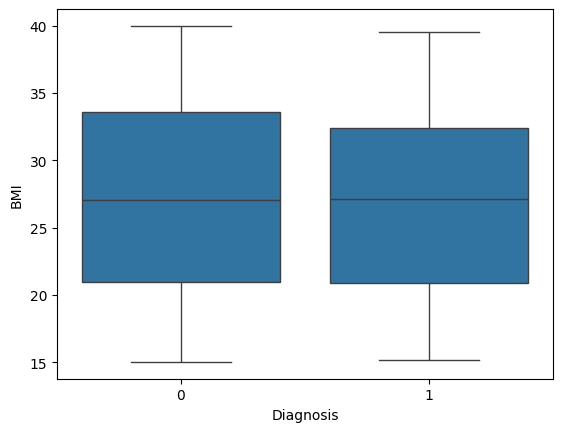

In [14]:
sns.boxplot(x='Diagnosis',y='BMI',data=df)

<Axes: xlabel='Smoking', ylabel='count'>

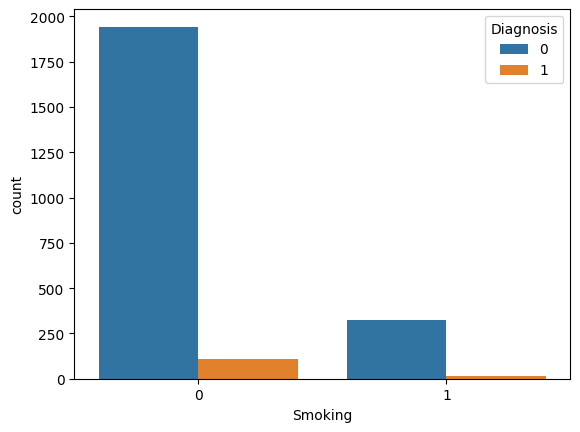

In [15]:
sns.countplot(x='Smoking',hue='Diagnosis',data=df)

<Axes: xlabel='HayFever', ylabel='count'>

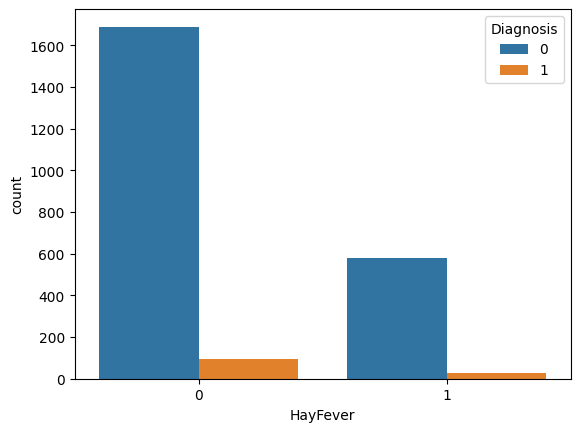

In [16]:
sns.countplot(x='HayFever',hue = 'Diagnosis',data=df)

In [17]:
##data is very imbalanced

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   EducationLevel          2392 non-null   int64  
 4   BMI                     2392 non-null   float64
 5   Smoking                 2392 non-null   int64  
 6   PhysicalActivity        2392 non-null   float64
 7   DietQuality             2392 non-null   float64
 8   SleepQuality            2392 non-null   float64
 9   PollutionExposure       2392 non-null   float64
 10  PollenExposure          2392 non-null   float64
 11  DustExposure            2392 non-null   float64
 12  PetAllergy              2392 non-null   int64  
 13  FamilyHistoryAsthma     2392 non-null   int64  
 14  HistoryOfAllergies      2392 non-null   

In [19]:
df.drop(['EducationLevel'],inplace = True,axis =1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2392 non-null   int64  
 1   Gender                  2392 non-null   int64  
 2   Ethnicity               2392 non-null   int64  
 3   BMI                     2392 non-null   float64
 4   Smoking                 2392 non-null   int64  
 5   PhysicalActivity        2392 non-null   float64
 6   DietQuality             2392 non-null   float64
 7   SleepQuality            2392 non-null   float64
 8   PollutionExposure       2392 non-null   float64
 9   PollenExposure          2392 non-null   float64
 10  DustExposure            2392 non-null   float64
 11  PetAllergy              2392 non-null   int64  
 12  FamilyHistoryAsthma     2392 non-null   int64  
 13  HistoryOfAllergies      2392 non-null   int64  
 14  Eczema                  2392 non-null   

In [21]:
df.duplicated().sum()

0

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
X = df.iloc[:,0:-1]

In [24]:
X

,Age,Gender,Ethnicity,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
0,63,0,1,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,0,0,1.369051,4.941206,0,0,1,0,0,1
1,26,1,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,0,2.197767,1.702393,1,0,0,1,1,1
2,57,0,2,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,1,0,1.698011,5.022553,1,1,1,0,1,1
3,40,1,2,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,1,0,3.032037,2.300159,1,0,1,1,1,0
4,61,0,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,1,0,3.470589,3.067944,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,29.059613,0,3.019854,6.119637,8.300960,2.483829,7.314582,...,0,0,3.125249,5.166032,0,1,0,0,0,1
2388,18,1,0,20.740850,0,5.805180,4.386992,7.731192,7.733983,2.279073,...,0,0,1.132977,5.509502,0,0,0,1,1,0
2389,54,0,3,37.079560,0,4.735169,8.214064,7.483521,2.794847,3.055139,...,1,0,1.685962,3.346877,1,0,1,1,0,1
2390,46,1,0,23.444712,0,9.672637,7.362861,6.717272,9.448862,7.712584,...,0,1,3.481549,1.713274,0,1,1,0,1,1


<Axes: xlabel='FamilyHistoryAsthma', ylabel='count'>

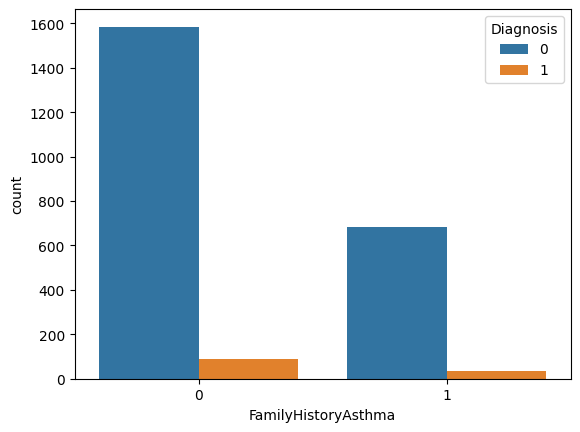

In [25]:
sns.countplot(data=df,x='FamilyHistoryAsthma',hue = 'Diagnosis')

In [26]:
# sns.pairplot(data = df,hue = 'Diagnosis')

In [27]:
from tensorflow import keras

In [28]:
from tensorflow.keras import layers

In [29]:
from tensorflow.keras.layers import Dense

In [30]:
X

,Age,Gender,Ethnicity,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,PollutionExposure,PollenExposure,...,HayFever,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced
0,63,0,1,15.848744,0,0.894448,5.488696,8.701003,7.388481,2.855578,...,0,0,1.369051,4.941206,0,0,1,0,0,1
1,26,1,2,22.757042,0,5.897329,6.341014,5.153966,1.969838,7.457665,...,0,0,2.197767,1.702393,1,0,0,1,1,1
2,57,0,2,18.395396,0,6.739367,9.196237,6.840647,1.460593,1.448189,...,1,0,1.698011,5.022553,1,1,1,0,1,1
3,40,1,2,38.515278,0,1.404503,5.826532,4.253036,0.581905,7.571845,...,1,0,3.032037,2.300159,1,0,1,1,1,0
4,61,0,0,19.283802,0,4.604493,3.127048,9.625799,0.980875,3.049807,...,1,0,3.470589,3.067944,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,43,1,0,29.059613,0,3.019854,6.119637,8.300960,2.483829,7.314582,...,0,0,3.125249,5.166032,0,1,0,0,0,1
2388,18,1,0,20.740850,0,5.805180,4.386992,7.731192,7.733983,2.279073,...,0,0,1.132977,5.509502,0,0,0,1,1,0
2389,54,0,3,37.079560,0,4.735169,8.214064,7.483521,2.794847,3.055139,...,1,0,1.685962,3.346877,1,0,1,1,0,1
2390,46,1,0,23.444712,0,9.672637,7.362861,6.717272,9.448862,7.712584,...,0,1,3.481549,1.713274,0,1,1,0,1,1


In [31]:
y = df.iloc[:,-1]

In [32]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2387    1
2388    1
2389    1
2390    0
2391    0
Name: Diagnosis, Length: 2392, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
X_train.shape

(1602, 25)

In [36]:
y_train

1547    0
2120    0
1272    0
1960    0
1080    0
       ..
1638    0
1095    0
1130    0
1294    0
860     0
Name: Diagnosis, Length: 1602, dtype: int64

In [37]:
scale = MinMaxScaler()

In [38]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled= scale.transform(X_test)

In [39]:
X_train_scaled

array([[0.48648649, 1.        , 1.        , ..., 0.        , 1.        ,
        1.        ],
       [0.27027027, 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.04054054, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.75675676, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.06756757, 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.24324324, 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ]])

In [40]:
X_test_scaled

array([[0.55405405, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.14864865, 0.        , 0.66666667, ..., 1.        , 1.        ,
        0.        ],
       [0.27027027, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02702703, 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.16216216, 0.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.62162162, 0.        , 0.        , ..., 0.        , 1.        ,
        1.        ]])

In [41]:
from keras import Sequential
model = Sequential()

In [42]:
model.add(Dense(100,activation='relu',input_dim=25))
model.add(Dense(100,activation='relu',input_dim=100))
model.add(Dense(100,activation='relu',input_dim=100))
model.add(Dense(100,activation='relu',input_dim=100))
model.add(Dense(100,activation='relu',input_dim=100))
model.add(Dense(1,activation='sigmoid'))

C:\Users\ayush\anaconda3\envs\tensor_flow_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,101 (168.36 KB)

 Trainable params: 43,101 (168.36 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(loss = 'binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [45]:
hist = model.fit(X_train_scaled,y_train,epochs = 100, validation_split=0.2)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9495 - loss: 0.3323 - val_accuracy: 0.9377 - val_loss: 0.2403
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9425 - loss: 0.2283 - val_accuracy: 0.9377 - val_loss: 0.2335
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9455 - loss: 0.2077 - val_accuracy: 0.9377 - val_loss: 0.2430
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9521 - loss: 0.1807 - val_accuracy: 0.9377 - val_loss: 0.2403
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9545 - loss: 0.1676 - val_accuracy: 0.9377 - val_loss: 0.2495
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1726 - val_accuracy: 0.9377 - val_loss: 0.2552
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9536 - loss: 0.1516 - val_accuracy: 0.9377 - val_loss: 0.3007
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9459 - loss: 0.1499 - val_accuracy: 0.9377 - v

In [46]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [50]:
prediction = model.predict(X_test_scaled)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step


In [51]:
predict

array([[1.80372185e-21],
       [6.29097650e-28],
       [3.61118461e-28],
       [7.68290694e-22],
       [1.46034262e-20],
       [6.58098631e-25],
       [5.00651107e-18],
       [3.07389986e-24],
       [2.32970349e-12],
       [9.62991273e-29],
       [1.87840968e-07],
       [1.38574889e-11],
       [1.16241695e-11],
       [4.62840898e-19],
       [9.50305915e-15],
       [1.54784480e-14],
       [3.19837627e-23],
       [1.52677435e-14],
       [2.18444376e-14],
       [5.99514970e-15],
       [2.08666544e-26],
       [3.98321480e-12],
       [5.31042446e-08],
       [8.10330858e-10],
       [2.82710688e-10],
       [3.67228253e-12],
       [2.12435581e-04],
       [1.73594683e-09],
       [1.45626245e-16],
       [1.09726507e-12],
       [1.28717916e-22],
       [4.34234220e-16],
       [1.58753890e-15],
       [3.45998401e-16],
       [7.86207444e-14],
       [1.47357959e-09],
       [1.22437541e-07],
       [2.61449884e-20],
       [5.43209641e-16],
       [1.51170293e-26],


In [56]:
test_predict = np.where(prediction>0.5,1,0)
test_predict

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [55]:
accuracy_score(test_predict,y_test)

0.9227848101265823

<Axes: xlabel='Diagnosis', ylabel='count'>

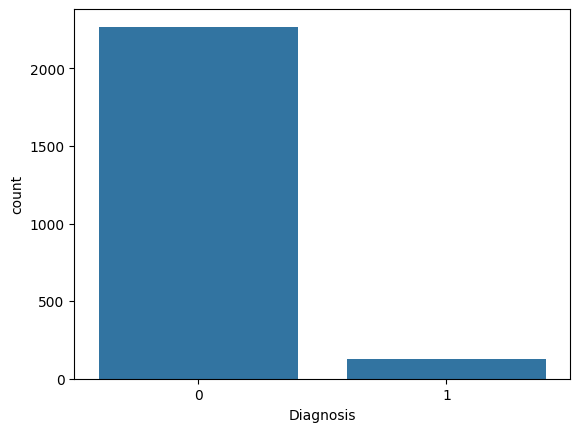

In [57]:
sns.countplot(x='Diagnosis',data = df)## data is very much imbalanced so correct output is difficult to find

In [58]:
np.argmax(y_test.tolist())

13

In [ ]:
plt.plot(hist.history)